# Aula 3 - Regressão linear

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Regressão linear simples

____
____
____

## 1) Introdução

Imagine que você quer vender sua casa.

Você sabe os atributos da sua casa: quantos cômodos têm, quantos carros cabem na garagem, qual é a área construída, qual sua localidade, etc.

Agora, a pergunta é: qual seria o melhor preço pra você colocá-la a venda, ou seja, quanto de fato ela vale?

Você pode solicitar a avaliação de um corretor de imóveis (contando com a experiência dele), ou então...

...fazer um modelo de **Machine Learning**, que, com base nos atributos e preços de diversas outras casas, pode fazer uma **predição** sobre o preço adequado da sua casa!

Para resolver este problema, podemos utilizar um dos mais simples e importantes algoritmos de machine learning: a **Regressão Linear!**

____

Para introduzirmos as ideias, vamos usar um [dataset de preço de casas](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Esta base de dados contém **79 features** (+ 1 ID), que são as características de cada uma das casas listadas; e **1 target** (`SalePrice`), que é o preço pelo qual aquela casa foi vendida.

Por termos o target disponível, estamos trabalhando com um problema de **aprendizagem supervisionada**.

Para o significado de cada uma das features, e os valores que elas podem assumir, veja a página acima.

**Vamos ler a base e começar a explorá-la!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dados_modelos/house_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [6]:
nulos = df.isnull().sum()
nulos[nulos > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
(nulos[nulos > 0] / df.shape[0]) * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [8]:
df.select_dtypes(exclude=np.number).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

Por enquanto, não vamos nos preocupar com os dados missing, pois vamos usar apenas uma feature no nosso modelo inicial.

Aproveite para depois explorar os dados da forma que quiser!

Por enquanto, vamos dar uma olhada na coluna target!

Mas antes, vamos identificar e diferenciar as features (X) do target (y)

> Obs.: a coluna "Id" traz apenas um número de identificação arbitrário que não deve ser correlacionado com o target. Portanto, vamos desconsiderar esta coluna como feature.

In [10]:
X = df.drop(columns=['SalePrice', 'Id'])
y = df['SalePrice']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
np.random.seed(1)
np.random.randint(low = 1, high = 10, size = 5)

array([6, 9, 6, 1, 1])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1130,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal
1294,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
860,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [14]:
print(X_train.shape)
print(X_test.shape)

(1168, 79)
(292, 79)


Agora sim, vamos olhar com carinho pro target

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

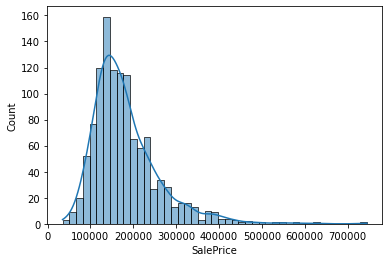

In [15]:
sns.histplot(y_train, kde=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

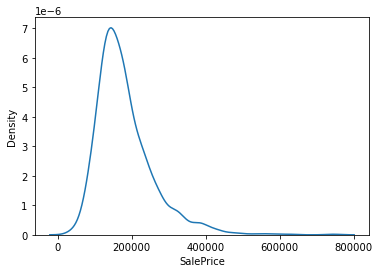

In [16]:
sns.kdeplot(y_train)

Tomar o log de distribuições enviesadas tende a diminuir o desvio:

In [17]:
log_price = np.log10(y_train)
log_price

254     5.161368
1066    5.250420
638     4.929419
799     5.243038
380     5.103804
          ...   
1095    5.246577
1130    5.130334
1294    5.060698
860     5.278639
1126    5.240549
Name: SalePrice, Length: 1168, dtype: float64

In [18]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [19]:
10 ** 5.161368

144999.99925379825

In [20]:
10 ** 5.246577

176431.8548753821

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

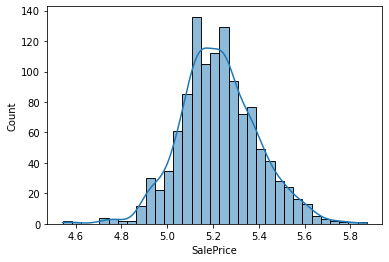

In [21]:
sns.histplot(log_price, kde=True)

Fica evidente que a distribuição é desviada para a direita.

Vamos tentar alterar isso na próximas versões do modelo para ver se teremos ganhos de performance!

Por enquanto, seguimos assim.

Vamos agora dar uma olhada na correlação das variáveis

In [22]:
data_feat_target = pd.concat([X_train, y_train], axis=1)
data_feat_target

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1130,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1294,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
860,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

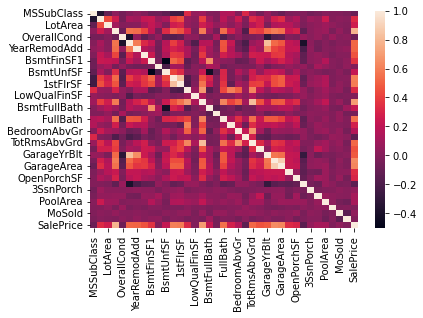

In [23]:
_ = sns.heatmap(data_feat_target.corr())

In [24]:
corr_feat_target = data_feat_target.corr()['SalePrice']
corr_feat_target

MSSubClass      -0.088081
LotFrontage      0.330066
LotArea          0.266204
OverallQual      0.785555
OverallCond     -0.074391
YearBuilt        0.516501
YearRemodAdd     0.508593
MasVnrArea       0.459123
BsmtFinSF1       0.359460
BsmtFinSF2      -0.005731
BsmtUnfSF        0.222487
TotalBsmtSF      0.597766
1stFlrSF         0.587883
2ndFlrSF         0.314030
LowQualFinSF    -0.011189
GrLivArea        0.695652
BsmtFullBath     0.226346
BsmtHalfBath    -0.048346
FullBath         0.552546
HalfBath         0.280481
BedroomAbvGr     0.156211
KitchenAbvGr    -0.142785
TotRmsAbvGrd     0.520388
Fireplaces       0.457549
GarageYrBlt      0.480351
GarageCars       0.640991
GarageArea       0.624139
WoodDeckSF       0.329843
OpenPorchSF      0.299969
EnclosedPorch   -0.149532
3SsnPorch        0.051532
ScreenPorch      0.119172
PoolArea         0.115630
MiscVal         -0.020179
MoSold           0.041890
YrSold          -0.009099
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [25]:
corr_feat_target[corr_feat_target.abs() > 0.65]

OverallQual    0.785555
GrLivArea      0.695652
SalePrice      1.000000
Name: SalePrice, dtype: float64

Em particular, podemos olhar a correlação entre as features e o target

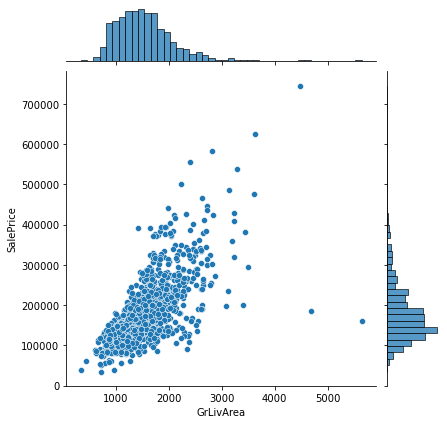

In [26]:
sns.jointplot(x=X_train['GrLivArea'], y=y_train)

Parece que a variável de área construída ("GrLivArea") é uma forte candidata a **explicar** o preço das casas, pois vemos calaramente uma correlação entre as variáveis!

Mas note que há claramente dois outliers... 

Vamos retirá-los (por propositos pedagogicos - lembre-se de tentar entender o pq dos outliers)

In [27]:
idxs_outliers = X_train[X_train['GrLivArea'] > 4500].index
idxs_outliers

Int64Index([523, 1298], dtype='int64')

In [28]:
X_train = X_train.drop(index = idxs_outliers)
y_train = y_train.drop(index= idxs_outliers)

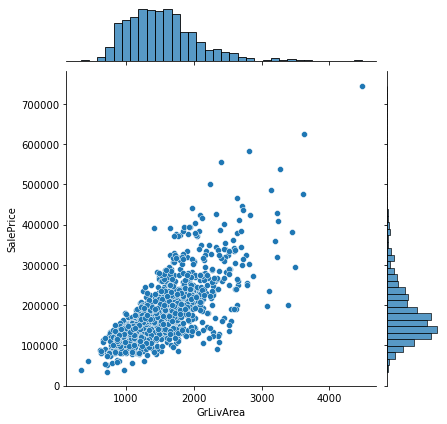

In [29]:
sns.jointplot(x=X_train['GrLivArea'], y=y_train)

Vamos agora iniciar a construção de um modelo bem simples, que utilize a variável GrLivArea para predizer o preço!

___
___
___

## 2) Regressão linear simples

Apesar de alguns outliers, parece bem adequado que os pontos plotados acima sejam descritos por uma reta, não é mesmo?

Ou, melhor dizendo: **a variável GrLivArea parece estar relacionada ao target SalePrice linearmente!**

Para modelarmos esta relação, vamos conhecer o modelo de **Regressão Linear Simples**.

Como o próprio nome diz, o modelo de Regressão Linear será **uma reta (polinômio linear)**, que melhor se ajusta aos seus dados!

O modelo de **Regressão Linear Simples** será uma linha reta que relaciona Y (o preço da casa) e X (os atributos da casa). 

Se utilizarmos **apenas um atributo** (como, por exemplo, a área construída), temos uma **Regressão Linear Simples**, e nosso modelo é:

$$ \hat{y} = b_0 + b_1 X $$

Neste caso, o modelo tem dois coeficientes (ou **parâmetros**) a serem determinados: $b_0$ (intercepto ou coeficiente linear) e $b_1$ (coeficiente angular). 

A equação acima exprime a **forma funcional** do conjunto de hipóteses com o qual trabalharemos: funções lineares, de uma úniva variável. Isto é,

$$ f_{H, \vec{b}} = b_0 + b_1 X $$

Ou seja,

$$ \mathcal{H} = \{ f_{H, \vec{b}}\} = \{ b_0 + b_1 X \} $$ 

é o conjunto de hipóteses que está sendo considerado, e o vetor de parâmetros é:

$$\vec{b} = \begin{bmatrix}
b_0\\ 
b_1
\end{bmatrix}$$

O **algoritmo de aprendizagem** do estimador é utilizado justamente para encontrarmos os coeficientes $b_0$ e $b_1$ (isto é, o vetor de parâmetros) **que melhor se ajustam aos dados!**

Para fazer isso, pode-se utilizar o método dos **mínimos quadrados** (OLS  - ordinary least squares) ou então o [gradiente descendente](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931).

Vamos conhecer o OLS!

## O algoritmo de aprendizagem da regressão linear

De maneira esquemática, um algoritmo de aprendizagem recebe:

- Um conjunto de hipóteses $\mathcal{H}$;
- Um conjunto de dados de treino $\left(X_i, y_i \right)$

A partir destes inputs, o algoritmo constrói uma **função de perda**, que nada mais é que uma função que contabiliza **os erros cometidos pelo modelo**.

E para sabermos o quanto um modelo está errando é muito simples: basta **compararmos o target predito $\hat{y}$ com o target real $y$**!

Isso pode ser feito de muitas maneiras. A "maneira" específica é o que determina a relação funcional da função de custo de interesse. Para regressão linear, a função de perda mais comum é o **erro quadrático (squared error)**:

$$\text{SE}= (y_i-\hat{y}_i)^2$$

Onde $i = 1, 2, \cdots, n$ é um índice que identifica cada uma das $n$ observações de treino.

Obs.: se tomarmos a média do SE em toda a base de treino, temos o **Mean Squared Error** (MSE):

$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> Quando tomamos a função de erro para uma única observação, a chamamos de **função de perda**. Quando tomamos sua média sobre todo o dataset, a chamamos de **função de custo**. Na prática, os termos são usados como sinônimos (e, pro problema matemático a ser resolvido, tanto faz também).

<img src=https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1600368657769-5BJU5FK86VZ6UXZGRC1M/Mean+Squared+Error.png width=400>

Agora, note uma coisa muito importante: **a função de custo é inteiramente dependente da função de hipótese (e, portanto, dos parâmetros!) e dos dados de treino!**

De fato, para a i-ésima observação, $\hat{y}_i = b_0 + b_1 X_i$ (note aqui a dependência da hipótese e dos dados!). Assim,

$$(y_i-\hat{y}_i)^2 = (y_i - (b_0 + b_1 X_i))^2 $$

Por isso, escrevemos a função de custo como $\mathcal{L}_{H, \vec{b}}(X_i, y_i)$, para deixar claro que ela depende tanto dos dados $\left(X_i, y_i \right)$ quando da hipótese parametrizada:

$$\mathcal{L}_{H, \vec{b}}(X_i, y_i) = \sum_{i=1}^n(y_i - (b_0 + b_1 X_i))^2$$


Uma vez que temos uma função de custo, nosso objetivo passa a ser **minimizá-la**. E isso faz total sentido: queremos que nosso modelo, após ter "aprendido", erre o mínimo possível!

Por isso, naturalmente caímos em um **problema de otimização**. Mas, a pergunta que surge é: queremos minimizar o erro **com relação a que?**

Agora, é importante lembrarmos que a **função hipótese é parametrizada**. E é justamente o vetor de parâmetros que determina **a reta que melhor se ajusta aos dados**. 

Assim, podemos resumir o objetivo do algoritmo de aprendizagem como:

> Determinar o vetor de parâmetros que minimiza a função de custo nos dados de treino

E isso faz total sentido, não é mesmo?

E, operacionalmente, isso é justamente o que queremos fazer:

$$\hat{b} = \operatorname*{argmin}_b \left( \mathcal{L}_{H, \vec{b}}(X_i, y_i) \right)$$

Existe uma forma muito conhecida e natural para resolvermos problemas de otimização como este: o famoso "deriva e iguala a 0".

E é exatamente o que o método OLS nos dá: através da otimização explícita da função de custo quadrática, temos uma expressão analítica para os parâmetros:

$$ \left\{\begin{matrix}
\frac{\partial \mathcal{L}}{\partial b_0} = 0\\ 
\frac{\partial \mathcal{L}}{\partial b_1} = 0
\end{matrix}\right. 
\Rightarrow
\left\{\begin{matrix}
\hat{b}_1 = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}\\ 
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}
\end{matrix}\right. \ ,
$$

onde: $\bar{x} = \frac{1}{n} \sum_i x_i$ e $\bar{y} = \frac{1}{n} \sum_i y_i$, são os valores médios da feature e target, respectivamente.

Para quem quiser saber detalhes sobre o procedimento acima, sugiro as referências citadas, ou então [este artigo super simples](https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf).

E esse é o algoritmo de aprendizagem da regressão linear!

_________

# Passo 1 - construção do modelo

Agora temos os dados, escolhemos o conjunto de hipóteses, e conhecemos também o algoritmo de treinamento da regressão linear!

Felizmente, não precisamos implementar este algoritmo na mão (embora, caso queira, fique à vontade! É um ótimo exercício!)

Aqui na aula, usaremos o sklearn para isso!

Vamos começar?

In [30]:
X_train_uma_feature =  X_train['GrLivArea'].values.reshape(-1, 1)
X_train_uma_feature

array([[1314],
       [1571],
       [ 796],
       ...,
       [ 864],
       [1426],
       [1555]])

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
estimador = LinearRegression()

In [34]:
estimador.fit(X_train_uma_feature, y_train)

LinearRegression()

In [35]:
estimador.intercept_

10895.380043257173

In [36]:
estimador.coef_

array([112.12517083])

Agora que o modelo está treinado, podemos dar uma olhada nos coeficientes que foram encontrados!

$$\vec{\hat{b}} = \begin{bmatrix}
\hat{b}_0\\ 
\hat{b}_1
\end{bmatrix} = 
\begin{bmatrix}
10895.38\\ 
112.12
\end{bmatrix}$$

Como interpretamos este resultado?

O nosso modelo final é dado por:

$$ \hat{y} = \mathcal{M} = f_{H, \hat{\vec{b}}}(X = \text{GrLiveArea}) =  10895.38 + 112.12 * \text{GrLiveArea}$$

Isto quer dizer que:

> Aumentando a variável "GrLiveArea" em uma unidade faz com que o preço seja aumentado em USD 112.12!

> O preço mínimo a ser pago, independente da área construída, é de 10895.38!

Podemos visualizar o modelo treinado, neste caso:

In [37]:
np.linspace(0, 100, 5)

array([  0.,  25.,  50.,  75., 100.])

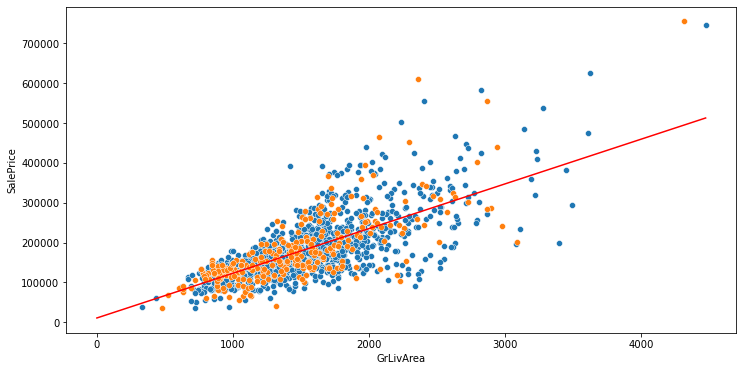

In [37]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=X_train['GrLivArea'], y=y_train)
sns.scatterplot(x=X_test['GrLivArea'], y=y_test)

x = np.linspace(0, X_train['GrLivArea'].max(), 2)
y = estimador.coef_[0] * x + estimador.intercept_

plt.plot(x, y, color='red')

In [38]:
x = np.linspace(0, X_train['GrLivArea'].max(), 5)
x

array([   0., 1119., 2238., 3357., 4476.])

In [39]:
x = np.array(x).reshape(-1, 1)
x

array([[   0.],
       [1119.],
       [2238.],
       [3357.],
       [4476.]])

In [40]:
for x_value in x:
    print(f'calculado: {estimador.coef_[0] * x_value + estimador.intercept_}')
    print(f'predito: {estimador.predict([x_value])}')
    print()

calculado: [10895.38004326]
predito: [10895.38004326]

calculado: [136363.44619926]
predito: [136363.44619926]

calculado: [261831.51235526]
predito: [261831.51235526]

calculado: [387299.57851126]
predito: [387299.57851126]

calculado: [512767.64466726]
predito: [512767.64466726]



____________

# Passo 2 - avaliação do modelo

Agora que temos o modelo treinado e algumas previsões, como avaliamos a performance do modelo?

É nesse momento que entra em jogo a **base de teste**!

Conheceremos agora algumas **métricas de avaliação**, que são medidas quantitativas para, de uma forma ou de outra, **comparar os targets reais com os targets preditos**.

> Existem várias métricas de avaliação diferentes, e cada uma avalia **um aspecto particular** da performance do modelo.

> Problemas de regressão e classificação admitem métricas de avaliação diferentes, dada a diferença entre os targets (contínuo vs discreto).

Ao analisarmos estas métricas **calculadas na base de teste**, podemos ter uma ideia boa sobre o **poder de generalização** de nosso modelo, pois estaremos efetivamente testando o modelo com **observações que não foram utilizadas em sua construção!**

Obs.: até podemos calcular as métricas de avaliação na base de treino, mas o propósito desse cálculo **não é a avaliação da generalização**. Veremos mais a frente em que contextos vale a pena calcularmos as métricas na base de treino. Mas, antes, vamos conhecer quais são as principais métricas!

In [41]:
y_test_predito = estimador.predict(X_test['GrLivArea'].values.reshape(-1, 1))

Observação: a coluna "Id" traz apenas um número de identificação arbitrário que não deve ser correlacionado com o target. Portanto, vamos desconsiderar esta coluna de nosso modelo!

Vamos conhecer algumas métricas para problemas de regressão!

Em problemas de regressão, é uma boa ideia dar uma olhada nos **resíduos** das predições! Os resíduos nada mais são do que **os erros do modelo**, ou seja, **a diferença entre cada valor predito e o valor real**, para **os dados de teste!** Isto é,

$$R(y_i) = y_i - \hat{y}_i $$

Rearranjando os termos, podemos escrever a equação acima como:

$$ \hat{y}_i= y_i - R(y_i)  $$

Perceba, portanto, que um modelo perfeito (o que, lembre-se, é virtualmente impossível, e não o que queremos!), seria tal que $\hat{y}_i= y_i$. Podemos visualizar este caso:

O caso 100% perfeito (na prática, impossível) seria $y_i = \hat{y}_i$, o que produziria uma reta exata!

Quanto mais "espalhados" estiverem os pontos em torno da reta, em geral **pior é o modelo**, pois ele está errando mais!

Uma forma de quantificar isso através de uma métrica conhecida como **$R^2$**, o **coeficiente de determinação**.

Este coeficiente indica **o quão próximos os dados estão da reta ajustada**. Por outro lado, o $R^2$ representa a porcentagem de variação na resposta que é explicada pelo modelo.

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$$

É possível utilizar o $R^2$ nos dados de treino, mas temos que tomar muito cuidado com a forma como interpretaremos esta métrica! Discutiremos mais a diante a importância de calcularmos as métricas de avaliação também na base de treino.

Por enquanto, vamos calcular o $R^2$ nos dados de teste apenas, como faremos a seguir. Essa métrica equivale, portanto, **ao gráfico que fizemos acima!**

Então, quanto mais próximo de 1, melhor o modelo!

In [42]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_predito)

0.5675383176324451

Outra coisa importante é que os resíduos sejam normalmente distribuídos (isso faz parte das premissas da visão mais estatística da regressão linear). Se esse não for o caso, pode ser importante que você reveja se a regressão linear de fato é um modelo adequado ao seu problema.

Mas, de maneira mais genérica, é interessante avaliarmos a **distribuição dos resíduos** para termos uma ideia da distribuição dos erros.

In [43]:
residuos = y_test - y_test_predito
residuos

892      23854.937513
1105     20112.422047
413     -11160.055654
522     -38471.664300
1036    122961.843216
            ...      
479     -48237.948249
1361     77553.108591
802      14850.371232
651     -72204.387993
722      16728.472362
Name: SalePrice, Length: 292, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

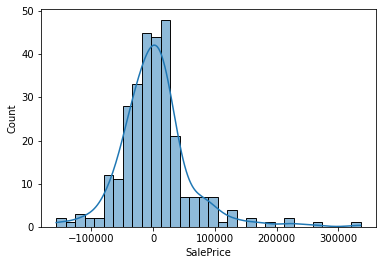

In [44]:
sns.histplot(residuos, kde=True)

Além dos resíduos, existem três principais **métricas de avaliação** do modelo de regressão linear:

**Mean Absolute Error** (MAE) é a média do valor absoluto de todos os resíduos (erros):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Mean absolute percentage error** (MAPE) é o erro absoluto médio relativo ao valor real dos targets:

$$\frac 1n\sum_{i=1}^n \left | \frac{y_i-\hat{y}_i}{y_i} \right| $$

Comparando as métricas:

- **MAE** é a mais simples de entender, mas ela penaliza mais erros menores;
- **MSE** é a métrica mais popular, pois essa métrica penaliza mais erros maiores, o que faz mais sentido na maior parte das aplicações reais.
- **RMSE** é ainda mais popular, pois esta métrica está nas mesmas unidades que o target.
- **MAPE** penaliza mais resíduos negativos (isto é, erros pra cima) do que residuos positivos (erros pra baixo).
    - $y_i = 100$ e $\hat{y}_i = 150$ (erro pra cima). Temos: $\text{MAPE} = \left | \frac{100 - 150}{100} \right| = 50 \%$
    - $y_i = 200$ e $\hat{y}_i = 150$ (erro pra baixo). Temos: $\text{MAPE} = \left | \frac{200 - 150}{200} \right| = 25 \%$

Estas métricas todas podem ser utilizadas como **funções de custo** a serem minimizadas pelo algoritmo do estimador.

Inclusive, já conhecemos uma delas: O MSE, que é usado como função de custo para o OLS!

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print(f'MAE {mean_absolute_error(y_test, y_test_predito)}')
print(f'MSE {mean_squared_error(y_test, y_test_predito)}')
print(f'RMSE {mean_squared_error(y_test, y_test_predito, squared=False)}')
print(f'MAPE {mean_absolute_percentage_error(y_test, y_test_predito)}')

MAE 38473.84499049466
MSE 3317122175.868091
RMSE 57594.46306606296
MAPE 0.2334321355471756


E é isso, passamos pela primeira vez pelo ciclo de modelagem! Muito legal, não é mesmo?

Mas, claro, é difícil de acreditar que um modelo tão simples, com uma única feature, é o melhor que podemos fazer.

Que tal fazermos algumas mudanças? Vamos entrar no ciclo!

__Como garantir que nosso modelo não está sofrendo de overfitting?__

Naturalmente, essa é uma pergunta de extrema importância, especialmente no contexto de **redes neurais**. [Veja aqui](https://towardsdatascience.com/8-simple-techniques-to-prevent-overfitting-4d443da2ef7d) e [aqui](https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323) algumas discussões.

Na prática: **jamais se apegue à peformance de treino como forma de avaliar o modelo!** 

O que queremos otimizar sempre será a performance **avaliada nos dados de teste**, isto é, a **performance de generalização** do modelo. 

Assim, é **avaliando o modelo nos dados de teste** que garantimos que uma boa performance não é produto do overfitting!

In [49]:
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Explorar os dados

In [50]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Limpando a base

In [51]:
print(f'numero de 0s no x= {(df.x==0).sum()}')
print(f'numero de 0s no y= {(df.y==0).sum()}')
print(f'numero de 0s no z= {(df.z==0).sum()}')

numero de 0s no x= 8
numero de 0s no y= 7
numero de 0s no z= 20


In [52]:
df['x'] = df['x'].replace(0,np.NaN)
df['y'] = df['y'].replace(0,np.NaN)
df['z'] = df['z'].replace(0,np.NaN)

In [53]:
print(f'numero de 0s no x= {(df.x==0).sum()}')
print(f'numero de 0s no y= {(df.y==0).sum()}')
print(f'numero de 0s no z= {(df.z==0).sum()}')

numero de 0s no x= 0
numero de 0s no y= 0
numero de 0s no z= 0


In [54]:
df = df.dropna()

In [55]:
df.shape

(53920, 10)

In [57]:
df['volume'] = df['x']*df['y']*df['z']

<AxesSubplot:xlabel='volume', ylabel='carat'>

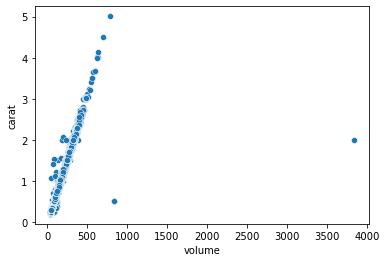

In [59]:
sns.scatterplot(data=df, x='volume', y='carat')

In [63]:
dff = df[~((df['volume']>500) & (df['carat'] < 3))].copy()

In [65]:
dff.describe()

,carat,depth,table,price,x,y,z,volume
count,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000
mean,0.797687,61.749565,57.456939,3930.910474,5.731605,5.733428,3.539409,129.802460
std,0.473777,1.432318,2.234069,3987.215003,1.119402,1.111272,0.691620,76.450353
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.188530
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.840180
75%,1.040000,62.500000,59.000000,5323.000000,6.540000,6.540000,4.040000,170.844704
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000,790.133208


/var/folders/ht/z42mr3sn5dv1fg_dxr0llwd00000gn/T/ipykernel_15512/2222051091.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.pairplot(dff.drop(['x', 'y', 'z'],1))


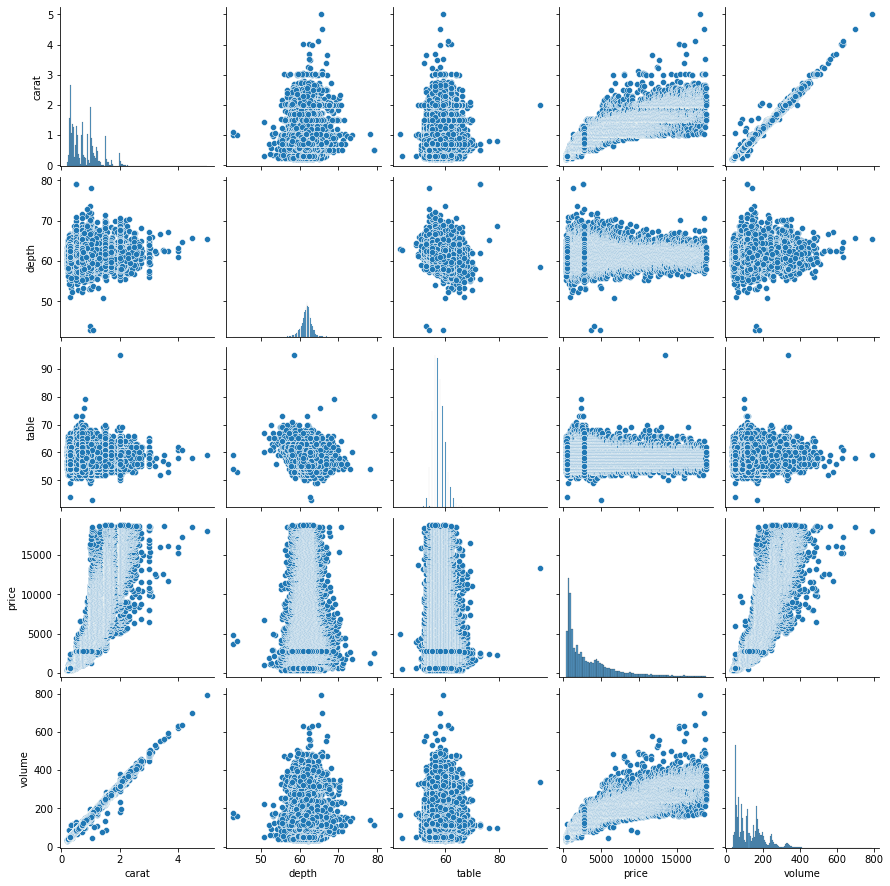

In [67]:
sns.pairplot(dff.drop(['x', 'y', 'z'],1))

### Treinando os dados

In [68]:
X = dff[['carat', 'volume']]
y = dff['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
lin_reg = LinearRegression()
#testando com o volume
model_volume = lin_reg.fit(X_train.drop('carat', 1), y_train)

y_pred_volume = model_volume.predict(X_test.drop('carat', 1))

In [ ]:
lin_reg = LinearRegression()
#testando com o carat
model_carat = lin_reg.fit(X_train.drop('volume', 1), y_train)

y_pred_carat = model_carat.predict(X_test.drop('volume', 1))

### Avaliando os Resultados

In [74]:
print(f'O R2 usando volume é: {r2_score(y_test,y_pred_volume)}')
print(f'O R2 usando carat é: {r2_score(y_test,y_pred_carat)}')

O R2 usando volume é: 0.8558007339917609
O R2 usando carat é: 0.8520411009198445
